In [1]:
'''
Author: Dhruv B kakadiya

'''

'\nAuthor: Dhruv B kakadiya\n\n'

In [2]:
# importing libraries

import os
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# models
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from PIL import Image
from glob import glob

# to mount a drive
from google.colab import drive

In [3]:
#Mounting the drive
drive.mount('/content/gdrive')

#Setting kaggle configuration directory
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Sem7_ML_Data/Kaggle"
%cd /content/gdrive/My Drive/Kaggle

#Downloading and unzip dataset
!kaggle datasets download -d moltean/fruits
!unzip \*.zip && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/111_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Traini

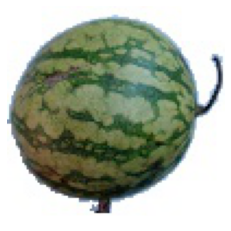

(100, 100, 3)


In [12]:
# printing Images
#Setting Training & Test dir paths
train_path = './fruits-360_dataset/fruits-360/Training/'
test_path = './fruits-360_dataset/fruits-360/Test/'

#Displaying the image
img = load_img(train_path + "Watermelon/r_8_100.jpg", target_size=(100, 100))
plt.imshow(img)
plt.axis("off")
plt.show()

#Printing the shape of the image array 
x = img_to_array(img)
print(x.shape)

The dataset is rich in terms of the variety of fruits it contains. Let’s explore some more images of the fruits. We’ll specify some fruit names in the images list and display them on a plot. We’ll do this using the matplotlib library.

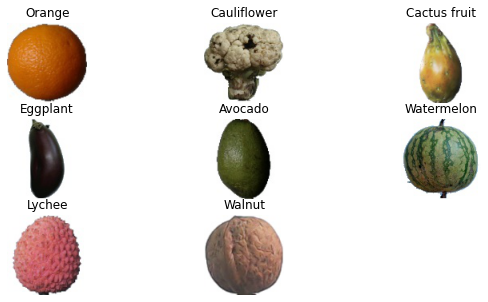

In [13]:
#Visualizing more Images

images = ['Orange', 'Cauliflower', 'Cactus fruit', 'Eggplant', 'Avocado', 'Watermelon','Lychee', 'Walnut']
fig = plt.figure(figsize = (10, 5))
for i in range(len(images)):
    ax = fig.add_subplot(3, 3, i + 1, xticks = [], yticks = [])
    plt.title(images[i])
    plt.axis("off")
    ax.imshow(load_img(train_path + images[i] +"/0_100.jpg", target_size=(100, 100)))

We’ll find the 4 most frequent fruits in the dataset. For this, we’ll create a list named fruits and populate it with all the occurrences of fruits. Then, we’ll use Counter from the collections library to find out the 4 most frequently occurring fruits in the ‘fruits’ list.

In [15]:
#Storing occurences of fruits in a list
fruits = []
fruits_image = []
for i in os.listdir(train_path):
    for image_filename in os.listdir(train_path + i):
        fruits.append(i) 
        fruits_image.append(i + '/' + image_filename)

#Finding top 5 frequent Fruits
newData = Counter(fruits)
frequent_fruits = newData.most_common(4)
print("Top 5 frequent Fruits:")
frequent_fruits

Top 5 frequent Fruits:


[('Grape Blue', 984),
 ('Plum 3', 900),
 ('Melon Piel de Sapo', 738),
 ('Cherry Rainier', 738)]

We’ll find out the total number of classes for the dataset. To do this, we’ll use glob. The glob module finds all the pathnames matching a specified pattern and returns them in arbitrary order. The directory containing a particular fruit’s image has the name same as that of the fruit. So, we’ll be able to get the classes of fruits from directory names.

In [16]:
#Finding number of classes
className = glob(train_path + '/*')
number_of_class = len(className)
print(number_of_class)

131


First, we’ll call an ‘empty’ sequential model. We’ll add to this empty model one layer at a time. The first layer is a convolutional layer with a depth of 32 and a filter size of 3x3.
Activation: "relu"

We need to specify an input size only for our first layer as the subsequent layers can infer the input size from the output size of the previous layer. Here, our input size is (100, 100, 3).

In [17]:
'''
There is a MaxPooling2D layer after every convolutional layer.
This layer downsamples the input representation by taking the maximum value over a window.
‘Pooling’ is basically the process of merging for the purpose of reducing the size of the data.
'''

#Creating the model
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(number_of_class)) 
model.add(Activation("softmax"))

#Compiling the model
model.compile(loss = "categorical_crossentropy",
optimizer = "rmsprop",
metrics = ["accuracy"])

#Getting model's summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 98, 98, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 47, 47, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        1

In [21]:
#Specifing epochs & batch size
epochs = 50
batch_size = 64

In [22]:
#Creating an object of ImageDataGenerator.
train_datagen = ImageDataGenerator(rescale= 1./255,
shear_range = 0.3,
horizontal_flip=True,
zoom_range = 0.3)
test_datagen = ImageDataGenerator(rescale= 1./255)

#Generating batches of Augmented data.
train_generator = train_datagen.flow_from_directory(
directory = train_path,
target_size= x.shape[:2],
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")

# test generator
test_generator = test_datagen.flow_from_directory(
directory = test_path,
target_size= x.shape[:2],
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [23]:
#Fitting the model
hist = model.fit_generator(
generator = train_generator,
steps_per_epoch = 1600 // batch_size,
epochs=epochs,
validation_data = test_generator,
validation_steps = 800 // batch_size)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
25/25 [==============================] - 19s 777ms/step - loss: 3.1854 - accuracy: 0.1850 - val_loss: 2.6210 - val_accuracy: 0.3138
Epoch 2/50
25/25 [==============================] - 19s 772ms/step - loss: 2.7941 - accuracy: 0.2694 - val_loss: 2.1344 - val_accuracy: 0.4401
Epoch 3/50
25/25 [==============================] - 19s 775ms/step - loss: 2.3827 - accuracy: 0.3281 - val_loss: 2.2229 - val_accuracy: 0.3451
Epoch 4/50
25/25 [==============================] - 19s 774ms/step - loss: 2.1365 - accuracy: 0.3781 - val_loss: 2.0267 - val_accuracy: 0.4310
Epoch 5/50
25/25 [==============================] - 19s 773ms/step - loss: 1.9202 - accuracy: 0.4350 - val_loss: 1.7731 - val_accuracy: 0.5026
Epoch 6/50
25/25 [==============================] - 19s 769ms/step - loss: 1.8001 - accuracy: 0.4600 - val_loss: 1.1189 - val_accuracy: 0.6901
Epoch 7/50
25/25 [==============================] - 19s 769ms/step - loss: 1.5815 - accuracy: 0.5213 - val_loss: 1.3827 - val_accuracy: 0.5911

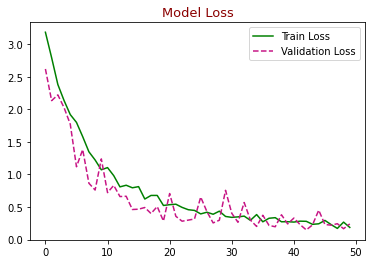

In [24]:
#Plotting train & validation loss
plt.figure()
plt.plot(hist.history["loss"],label = "Train Loss", color = "green")
plt.plot(hist.history["val_loss"],label = "Validation Loss", color = "mediumvioletred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Loss", color = "darkred", size = 13)
plt.legend()
plt.show()

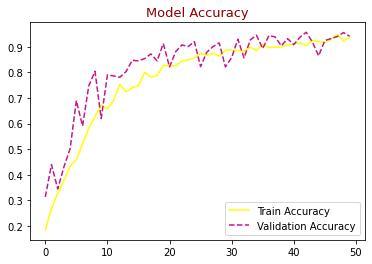

In [25]:
#Plotting train & validation accuracy
plt.figure()
plt.plot(hist.history["accuracy"],label = "Train Accuracy", color = "yellow")
plt.plot(hist.history["val_accuracy"],label = "Validation Accuracy", color = "mediumvioletred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Accuracy", color = "darkred", size = 13)
plt.legend()
plt.show()